# Part 3 - Linear Regression

In this notebook, we will perform linear regression on a dataset we've just created in EDA. The objective is to build an appropriate linear regression model to tell that which hyperparameters are most important in helping the performance of the model.

- Stepwise regression
  
- Model evaluation 
- Model interpretation

> **Note**: this notebook uses R kernel to perform linear regression. If you don't have R kernel for Jupyter, you can just copy and paste the code into R console.

In [1]:
library(leaps)

data <- read.csv("data/eda_data.csv")
head(data, 5)

Warning message:
"package 'leaps' was built under R version 4.4.2"


,X,learning_rate,n_estimators,max_depth,min_child_weight,subsample,gamma,alpha,lambda,colsample_bytree,scale_pos_weight,F1,learning_rate_n_estimators,learning_rate_max_depth,n_estimators_max_depth,max_depth_subsample,alpha_lambda,max_depth_min_child_weight,scale_pos_weight_max_depth,max_depth_colsample_bytree
,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,0,0.11861663,915,9,5,0.9216662,0.30814537,0.6040050,0.5648192,0.9611604,3,0.8080999,108.53422,1.0675497,8235,8.294996,0.3411536,45,27,8.650444
2,1,0.28570715,549,4,1,0.9465693,0.02243028,0.8713336,0.3392034,0.9257677,1,0.8185859,156.85322,1.1428286,2196,3.786277,0.2955593,4,4,3.703071
3,2,0.22227824,553,7,5,0.6238469,0.31127350,0.9989047,0.3226837,0.7836637,2,0.8047893,122.91987,1.5559477,3871,4.366929,0.3223303,35,14,5.485646
4,3,0.18361096,728,7,2,0.8768202,0.15445886,0.6077628,0.6449063,0.7007154,3,0.8044808,133.66878,1.2852767,5096,6.137742,0.3919501,14,21,4.905008
5,4,0.05524541,320,8,5,0.6559950,0.18436258,0.4047059,0.8514844,0.7481281,4,0.8071021,17.67853,0.4419632,2560,5.247960,0.3446008,40,32,5.985025


## Stepwise Regression

In this section, we will use `regsubset()` function from the `leaps` package to perform stepwise regression. The `regsubset()` function takes a formula and a data frame as input and returns the best subset of variables that can be used to explain the response variable. The function uses forward selection to select the best variables, and then uses backward elimination to remove the least significant variables.

In [5]:
null_model <- lm(F1 ~ 1, data = data)
full_model <- lm(F1 ~ ., data = data)
fit <- step(null_model,
            scope = list(lower = null_model, upper = full_model),
            direction = "both")

Start:  AIC=-13918.55
F1 ~ 1

                             Df Sum of Sq      RSS    AIC
+ learning_rate_max_depth     1  0.047710 0.089294 -14557
+ scale_pos_weight_max_depth  1  0.041528 0.095476 -14457
+ n_estimators_max_depth      1  0.031180 0.105823 -14303
+ max_depth                   1  0.030940 0.106063 -14300
+ max_depth_colsample_bytree  1  0.027796 0.109208 -14256
+ scale_pos_weight            1  0.026032 0.110971 -14232
+ learning_rate_n_estimators  1  0.021680 0.115323 -14174
+ max_depth_subsample         1  0.017963 0.119041 -14127
+ learning_rate               1  0.015738 0.121266 -14099
+ max_depth_min_child_weight  1  0.009626 0.127377 -14026
+ n_estimators                1  0.006369 0.130634 -13988
+ subsample                   1  0.002573 0.134431 -13945
+ gamma                       1  0.001414 0.135589 -13932
+ alpha                       1  0.000313 0.136690 -13920
<none>                                    0.137004 -13919
+ colsample_bytree            1  0.000102 

In [6]:
summary(fit)


Call:
lm(formula = F1 ~ learning_rate_max_depth + scale_pos_weight + 
    n_estimators_max_depth + subsample + learning_rate + scale_pos_weight_max_depth + 
    max_depth + max_depth_subsample + gamma + n_estimators + 
    learning_rate_n_estimators + alpha + colsample_bytree, data = data)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0216921 -0.0028888 -0.0001722  0.0027666  0.0174918 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 8.480e-01  2.957e-03 286.768  < 2e-16 ***
learning_rate_max_depth    -1.329e-02  6.665e-04 -19.933  < 2e-16 ***
scale_pos_weight           -9.852e-03  3.200e-04 -30.788  < 2e-16 ***
n_estimators_max_depth     -2.522e-06  2.265e-07 -11.132  < 2e-16 ***
subsample                  -1.141e-02  3.095e-03  -3.687 0.000235 ***
learning_rate               6.127e-02  5.177e-03  11.835  < 2e-16 ***
scale_pos_weight_max_depth  9.752e-04  5.091e-05  19.156  < 2e-16 ***
max_depth

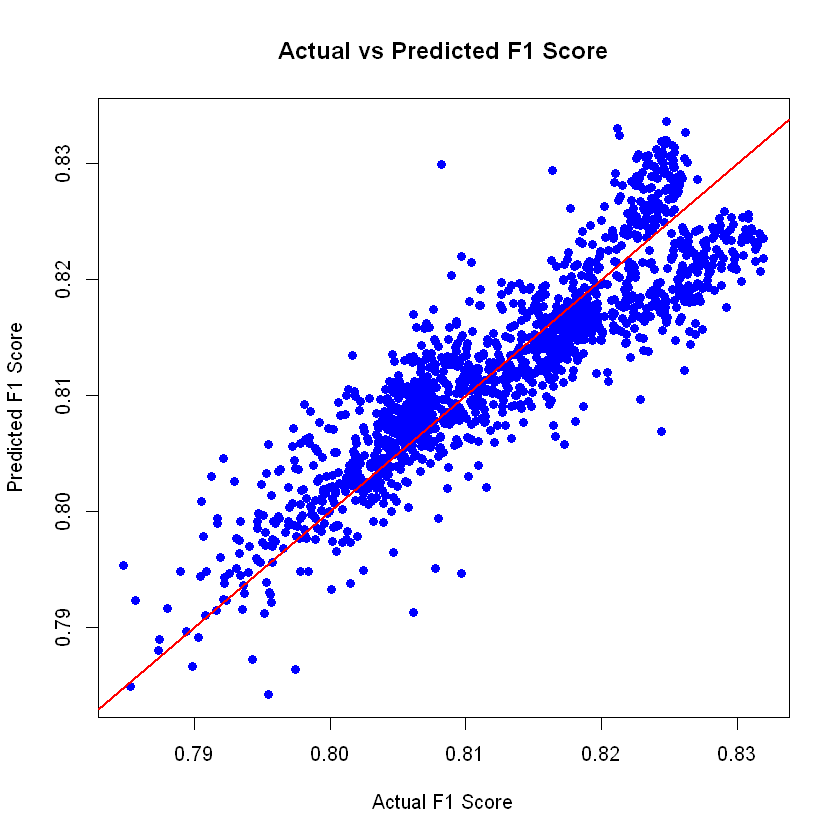

In [8]:
# 預測值
predicted <- predict(fit, newdata = data)

# 散點圖
plot(data$F1, predicted,
     main = "Actual vs Predicted F1 Score",
     xlab = "Actual F1 Score",
     ylab = "Predicted F1 Score",
     pch = 16, col = "blue")
abline(0, 1, col = "red", lwd = 2)  # 參考線
